In [5]:

import pandas as pd


In [2]:

file_path = 'C:/Users/mune1/OneDrive/Desktop/wcmatches.csv'  
data = pd.read_csv(file_path)


In [3]:

print("Dataset loaded successfully!")
data.head()

Dataset loaded successfully!


,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul,Tuesday


In [4]:
missing_values = data['win_conditions'].isnull().sum()
print(f"Number of missing values in 'win_conditions': {missing_values}")

Number of missing values in 'win_conditions': 838


In [5]:
# Fill missing values based on winning_team
def fill_win_conditions_based_on_team(row):
    if pd.isnull(row['win_conditions']):
        return f"{row['winning_team']} won in 90 minutes"
    return row['win_conditions']

data['win_conditions'] = data.apply(fill_win_conditions_based_on_team, axis=1)

print(data.head())

   year  country        city    stage  home_team      away_team  home_score  \
0  1930  Uruguay  Montevideo  Group 1     France         Mexico           4   
1  1930  Uruguay  Montevideo  Group 4    Belgium  United States           0   
2  1930  Uruguay  Montevideo  Group 2     Brazil     Yugoslavia           1   
3  1930  Uruguay  Montevideo  Group 3       Peru        Romania           1   
4  1930  Uruguay  Montevideo  Group 1  Argentina         France           1   

   away_score outcome                   win_conditions   winning_team  \
0           1       H         France won in 90 minutes         France   
1           3       A  United States won in 90 minutes  United States   
2           2       A     Yugoslavia won in 90 minutes     Yugoslavia   
3           3       A        Romania won in 90 minutes        Romania   
4           0       H      Argentina won in 90 minutes      Argentina   

  losing_team        date month dayofweek  
0      Mexico  1930-07-13   Jul    Sunday 

In [6]:
data.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,France won in 90 minutes,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,United States won in 90 minutes,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,Yugoslavia won in 90 minutes,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,Romania won in 90 minutes,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,Argentina won in 90 minutes,Argentina,France,1930-07-15,Jul,Tuesday


In [7]:
# Calculate match outcome based on home_team and winning_team
def calculate_match_outcome(row):
    if row['winning_team'] == 'NA':  
        return 'Draw'
    elif row['home_team'] == row['winning_team']:
        return 'Won'
    else:
        return 'Loss'

In [8]:

data['Match_Outcome'] = data.apply(calculate_match_outcome, axis=1)

In [9]:

print(data[['home_team', 'winning_team', 'Match_Outcome']].head())

   home_team   winning_team Match_Outcome
0     France         France           Won
1    Belgium  United States          Loss
2     Brazil     Yugoslavia          Loss
3       Peru        Romania          Loss
4  Argentina      Argentina           Won


In [10]:
data.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek,Match_Outcome
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,France won in 90 minutes,France,Mexico,1930-07-13,Jul,Sunday,Won
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,United States won in 90 minutes,United States,Belgium,1930-07-13,Jul,Sunday,Loss
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,Yugoslavia won in 90 minutes,Yugoslavia,Brazil,1930-07-14,Jul,Monday,Loss
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,Romania won in 90 minutes,Romania,Peru,1930-07-14,Jul,Monday,Loss
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,Argentina won in 90 minutes,Argentina,France,1930-07-15,Jul,Tuesday,Won


In [11]:
first_40_rows = data.head(40)

print(first_40_rows)

    year  country        city          stage       home_team       away_team  \
0   1930  Uruguay  Montevideo        Group 1          France          Mexico   
1   1930  Uruguay  Montevideo        Group 4         Belgium   United States   
2   1930  Uruguay  Montevideo        Group 2          Brazil      Yugoslavia   
3   1930  Uruguay  Montevideo        Group 3            Peru         Romania   
4   1930  Uruguay  Montevideo        Group 1       Argentina          France   
5   1930  Uruguay  Montevideo        Group 1           Chile          Mexico   
6   1930  Uruguay  Montevideo        Group 2         Bolivia      Yugoslavia   
7   1930  Uruguay  Montevideo        Group 4        Paraguay   United States   
8   1930  Uruguay  Montevideo        Group 3         Uruguay            Peru   
9   1930  Uruguay  Montevideo        Group 1       Argentina          Mexico   
10  1930  Uruguay  Montevideo        Group 1           Chile          France   
11  1930  Uruguay  Montevideo        Gro

In [12]:
row_35 = data.iloc[35]  

print(row_35)

year                               1938
country                          France
city                              Paris
stage                       Round of 16
home_team                       Germany
away_team                   Switzerland
home_score                            1
away_score                            1
outcome                               D
win_conditions    nan won in 90 minutes
winning_team                        NaN
losing_team                         NaN
date                         1938-06-04
month                               Jun
dayofweek                      Saturday
Match_Outcome                      Loss
Name: 35, dtype: object


In [13]:
missing_values = data['win_conditions'].isnull().sum()

print(f"Number of missing values in 'win_conditions': {missing_values}")

Number of missing values in 'win_conditions': 0


In [14]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
895    False
896    False
897    False
898    False
899    False
Length: 900, dtype: bool

In [15]:
import re

In [16]:
# Check if a city name contains symbols or numbers
def contains_symbol_or_number(city):
    # Check if city contains any digit or special symbol 
   return bool(re.search(r'[^A-Za-z]', str(city))) 


In [17]:

cities_with_symbols_or_numbers = data[data['city'].apply(contains_symbol_or_number)]


In [18]:
# List of unique cities with symbols or numbers
cities_with_symbols_or_numbers_list = cities_with_symbols_or_numbers['city'].unique()

print(cities_with_symbols_or_numbers_list)

['Le Havre' 'Rio de Janeiro' 'São Paulo' 'Belo Horizonte' 'Porto Alegre'
 'Zürich' 'Malmö' 'Norrköping' 'Västerås' 'Borås' 'Örebro' 'Viña del Mar'
 'Mexico City' 'León' 'Frankfurt am Main' 'Düsseldorf' 'Buenos Aires'
 'Mar del Plata' 'Córdoba' 'La Coruña' 'Málaga' 'Gijón' 'Nezahualcóyotl'
 'Querétaro' 'East Rutherford' 'Palo Alto' 'Saint-Denis' 'Saint-Étienne'
 'Ōita' 'Cape Town' 'Port Elizabeth' 'Cuiabá' 'Brasília'
 'Saint Petersburg' 'Rostov-on-Don' 'Nizhny Novgorod']


In [19]:
row_57 = data.iloc[57]  

print(row_57)

year                                      1950
country                                 Brazil
city                            Belo Horizonte
stage                                  Group 1
home_team                          Switzerland
away_team                           Yugoslavia
home_score                                   0
away_score                                   3
outcome                                      A
win_conditions    Yugoslavia won in 90 minutes
winning_team                        Yugoslavia
losing_team                        Switzerland
date                                1950-06-25
month                                      Jun
dayofweek                               Sunday
Match_Outcome                             Loss
Name: 57, dtype: object


In [20]:
draw_count = data['outcome'].value_counts().get('D', 0)

print(f'The number of draws (D) in the outcome column is: {draw_count}')

The number of draws (D) in the outcome column is: 169


In [21]:
# Create the new 'win-notwin' column based on the 'outcome' column
data['win-notwin'] = data['outcome'].apply(lambda x: 'win' if x == 'H' else 'notwin')
print(data[['outcome', 'win-notwin']].head())

  outcome win-notwin
0       H        win
1       A     notwin
2       A     notwin
3       A     notwin
4       H        win


In [22]:

print("Dataset loaded successfully!")
data.head()

Dataset loaded successfully!


,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek,Match_Outcome,win-notwin
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,France won in 90 minutes,France,Mexico,1930-07-13,Jul,Sunday,Won,win
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,United States won in 90 minutes,United States,Belgium,1930-07-13,Jul,Sunday,Loss,notwin
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,Yugoslavia won in 90 minutes,Yugoslavia,Brazil,1930-07-14,Jul,Monday,Loss,notwin
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,Romania won in 90 minutes,Romania,Peru,1930-07-14,Jul,Monday,Loss,notwin
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,Argentina won in 90 minutes,Argentina,France,1930-07-15,Jul,Tuesday,Won,win


In [23]:
# Create a new column to store the difference between home_score and away_score
data['score_diff'] = data['home_score'] - data['away_score']

In [24]:
print("Dataset loaded successfully!")
data.head()

Dataset loaded successfully!


,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek,Match_Outcome,win-notwin,score_diff
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,France won in 90 minutes,France,Mexico,1930-07-13,Jul,Sunday,Won,win,3
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,United States won in 90 minutes,United States,Belgium,1930-07-13,Jul,Sunday,Loss,notwin,-3
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,Yugoslavia won in 90 minutes,Yugoslavia,Brazil,1930-07-14,Jul,Monday,Loss,notwin,-1
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,Romania won in 90 minutes,Romania,Peru,1930-07-14,Jul,Monday,Loss,notwin,-2
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,Argentina won in 90 minutes,Argentina,France,1930-07-15,Jul,Tuesday,Won,win,1


In [4]:
import numpy as np

In [26]:
# Calculate the mean and standard deviation of the score_diff
mean = np.mean(data['score_diff'])
std_dev = np.std(data['score_diff'])

In [27]:
# Calculate the Z-scores for the score_diff column manually
z_scores = (data['score_diff'] - mean) / std_dev

In [28]:
# Set a threshold for Z-scores 
threshold = 3

In [29]:
outliers_z = np.abs(z_scores) > threshold

In [30]:

outlier_rows = data[outliers_z]

In [31]:

print("Rows with outliers based on Z-scores:")
print(outlier_rows[['year', 'home_team', 'away_team', 'home_score', 'away_score', 'score_diff', 'outcome']])

Rows with outliers based on Z-scores:
     year    home_team     away_team  home_score  away_score  score_diff  \
45   1938         Cuba        Sweden           0           8          -8   
64   1950      Bolivia       Uruguay           0           8          -8   
81   1954      Hungary   South Korea           9           0           9   
86   1954     Scotland       Uruguay           0           7          -7   
89   1954  South Korea        Turkey           0           7          -7   
243  1974   Yugoslavia         Zaire           9           0           9   
246  1974        Haiti        Poland           0           7          -7   
311  1982      Hungary   El Salvador          10           1           9   
581  2002      Germany  Saudi Arabia           8           0           8   
738  2010     Portugal   North Korea           7           0           7   
832  2014       Brazil       Germany           1           7          -6   

    outcome  
45        A  
64        A  
81     

In [70]:


# Initialize parameters
k = 5  # Number of past games to consider for streaks
gamma = 0.33  # Stealing fraction for Form
initial_form = 1  # Initial Form value for all teams

# Initialize Streak, Weighted Streak, and Form dictionaries
teams = pd.concat([data['home_team'], data['away_team']]).unique()
streaks = {team: [] for team in teams}
forms = {team: initial_form for team in teams}

# Helper function to compute streak and weighted streak
def compute_streak(team, outcomes):
    streak = sum(outcomes[-k:]) / (3 * k) if len(outcomes) >= k else sum(outcomes) / (3 * len(outcomes))
    weights = [i + 1 for i in range(len(outcomes[-k:]))]
    weighted_streak = sum(w * o for w, o in zip(weights, outcomes[-k:])) / (3 * sum(weights)) if len(outcomes) >= k else sum(w * o for w, o in zip(weights, outcomes)) / (3 * sum(weights))
    
    return streak, weighted_streak  # Return both streak and weighted streak

# Iterate through the matches
for idx, row in data.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    winning_team = row['winning_team']
    
    # Assign result values: 3 = win, 1 = draw, 0 = loss
    if winning_team == home_team:
        home_result, away_result = 3, 0
    elif winning_team == away_team:
        home_result, away_result = 0, 3
    else:  # Draw
        home_result, away_result = 1, 1

    # Update streaks and weighted streaks
    streaks[home_team].append(home_result)
    streaks[away_team].append(away_result)
    
    home_streak, home_weighted_streak = compute_streak(home_team, streaks[home_team])
    away_streak, away_weighted_streak = compute_streak(away_team, streaks[away_team])

    # Update Form
    home_form = forms[home_team]
    away_form = forms[away_team]
    
    if home_result == 3:  # Home team wins
        forms[home_team] += gamma * forms[away_team]
        forms[away_team] -= gamma * forms[away_team]
    elif away_result == 3:  # Away team wins
        forms[away_team] += gamma * forms[home_team]
        forms[home_team] -= gamma * forms[home_team]
    elif home_result == 1 and away_result == 1:  # Draw
        forms[home_team] -= gamma * (forms[home_team] - forms[away_team])
        forms[away_team] -= gamma * (forms[away_team] - forms[home_team])

    # Add computed features back to the dataset
    data.loc[idx, 'Home_Streak'] = home_streak
    data.loc[idx, 'Away_Streak'] = away_streak
    data.loc[idx, 'Home_Weighted_Streak'] = home_weighted_streak
    data.loc[idx, 'Away_Weighted_Streak'] = away_weighted_streak
    data.loc[idx, 'Home_Form'] = forms[home_team]
    data.loc[idx, 'Away_Form'] = forms[away_team]

data[['home_team', 'away_team', 'winning_team', 
      'Home_Streak', 'Away_Streak', 
      'Home_Weighted_Streak', 'Away_Weighted_Streak', 
      'Home_Form', 'Away_Form']].head(10)


,home_team,away_team,winning_team,Home_Streak,Away_Streak,Home_Weighted_Streak,Away_Weighted_Streak,Home_Form,Away_Form
0,France,Mexico,France,1.0,0.0,1.0,0.000000,1.330000,0.670000
1,Belgium,United States,United States,0.0,1.0,0.0,1.000000,0.670000,1.330000
2,Brazil,Yugoslavia,Yugoslavia,0.0,1.0,0.0,1.000000,0.670000,1.330000
3,Peru,Romania,Romania,0.0,1.0,0.0,1.000000,0.670000,1.330000
4,Argentina,France,Argentina,1.0,0.5,1.0,0.333333,1.438900,0.891100
5,Chile,Mexico,Chile,1.0,0.0,1.0,0.000000,1.221100,0.448900
6,Bolivia,Yugoslavia,Yugoslavia,0.0,1.0,0.0,1.000000,0.670000,1.660000
7,Paraguay,United States,United States,0.0,1.0,0.0,1.000000,0.670000,1.660000
8,Uruguay,Peru,Uruguay,1.0,0.0,1.0,0.000000,1.221100,0.448900
9,Argentina,Mexico,Argentina,1.0,0.0,1.0,0.000000,1.587037,0.300763


In [71]:
print(data[['home_team', 'away_team', 'winning_team', 
            'Home_Streak', 'Away_Streak', 
            'Home_Weighted_Streak', 'Away_Weighted_Streak', 
            'Home_Form', 'Away_Form']].tail(10))

    home_team    away_team winning_team  Home_Streak  Away_Streak  \
890    Sweden  Switzerland       Sweden     0.600000     0.333333   
891  Colombia      England      England     0.400000     0.666667   
892   Uruguay       France       France     0.800000     0.866667   
893    Brazil      Belgium      Belgium     0.666667     1.000000   
894    Sweden      England      England     0.600000     0.800000   
895    Russia      Croatia      Croatia     0.600000     1.000000   
896    France      Belgium       France     0.866667     0.800000   
897   Croatia      England      Croatia     1.000000     0.600000   
898   Belgium      England      Belgium     0.800000     0.400000   
899    France      Croatia       France     0.866667     0.800000   

     Home_Weighted_Streak  Away_Weighted_Streak  Home_Form  Away_Form  
890              0.733333              0.333333   2.256544   0.579345  
891              0.466667              0.688889   0.952520   1.095243  
892              0.66666

In [3]:
data.to_csv('C:/Users/mune1/OneDrive/Desktop/updated_wcmatches_with_features.csv', index=False)

NameError: name 'data' is not defined

In [2]:
data.to_csv('C:/Users/mune1/OneDrive/Desktop/updated_wcmatches_with_features.csv', index=False)

NameError: name 'data' is not defined

In [2]:
import pandas as pd

In [3]:
file_path = 'C:/Users/mune1/OneDrive/Desktop/updated_wcmatches_with_features.csv'  
data = pd.read_csv(file_path)

                      Match_Outcome_encoded  win-notwin_encoded  score_diff
match_score                        0.920890            0.920890    0.802455
Home_Weighted_Streak               0.722792            0.722792    0.586853
home_score                         0.596149            0.596149    0.765938
Home_Streak                        0.577691            0.577691    0.480506
Home_Form                          0.437619            0.437619    0.339346
year                              -0.016997           -0.016997   -0.016311
Away_Form                         -0.417154           -0.417154   -0.418935
Away_Streak                       -0.445306           -0.445306   -0.506785
away_score                        -0.478551           -0.478551   -0.684683
Away_Weighted_Streak              -0.590100           -0.590100   -0.633328


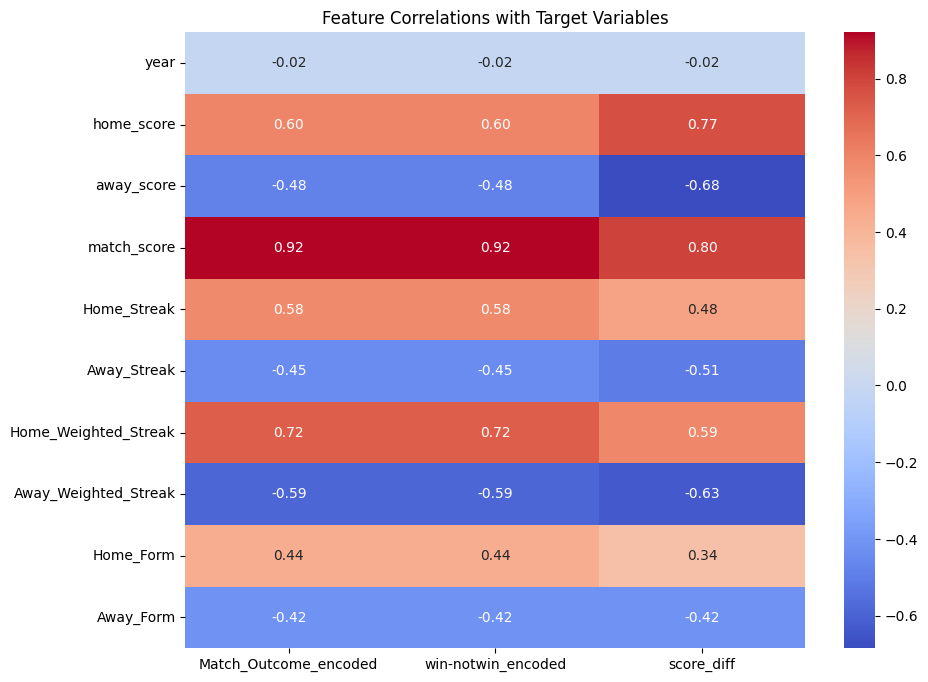

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target variables
data['Match_Outcome_encoded'] = data['Match_Outcome'].map({'Won': 1, 'Loss': 0})
data['win-notwin_encoded'] = data['win-notwin'].map({'win': 1, 'notwin': 0})

# Select numerical columns for correlation analysis
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = data[numerical_features].corr()

# Extract correlations with target variables
target_variables = ['Match_Outcome_encoded', 'win-notwin_encoded', 'score_diff']
correlations_with_target = correlation_matrix[target_variables].drop(index=target_variables)

# Display the sorted correlations for clarity
correlations_with_target_sorted = correlations_with_target.sort_values(by='Match_Outcome_encoded', ascending=False)
print(correlations_with_target_sorted)

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations with Target Variables")
plt.show()

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Assume the dataset is loaded in `data` DataFrame
numeric_features = ['home_score', 'away_score', 'match_score', 'Home_Streak', 'Away_Streak','Home_Form', 'Away_Form']
X = data[numeric_features]
target_column = 'outcome'
label_encoder = LabelEncoder()
data['outcome_encoded'] = label_encoder.fit_transform(data[target_column])
y = data['outcome_encoded']  # Encoded target variable

anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X, y)

anova_scores = pd.DataFrame({
    'Feature': numeric_features,
    'ANOVA F-Score': anova_selector.scores_
}).sort_values(by='ANOVA F-Score', ascending=False)

print(anova_scores)

       Feature  ANOVA F-Score
2  match_score            inf
1   away_score     277.830501
0   home_score     252.426596
3  Home_Streak     227.729493
4  Away_Streak     200.853553
6    Away_Form     143.473107
5    Home_Form     110.465171


c:\Users\mune1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [12]:
print(data['year'].dtype)

int64


In [13]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [9]:
# List of categorical features
categorical_features = ['home_team', 'away_team', 'city','country','winning_team','losing_team']

# Encode categorical features
encoded_data = data[categorical_features].apply(LabelEncoder().fit_transform)

# Encode the target variable
target_encoded = LabelEncoder().fit_transform(data['outcome'])

In [10]:
# Chi-Square test
chi2_stat, p_values = chi2(encoded_data, target_encoded)

chi2_results = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2_Statistic': chi2_stat,
    'P_Value': p_values
})
print(chi2_results)

        Feature  Chi2_Statistic       P_Value
0     home_team       89.652270  3.406096e-20
1     away_team       12.465817  1.963732e-03
2          city        6.396493  4.083374e-02
3       country        0.184609  9.118274e-01
4  winning_team     5264.076143  0.000000e+00
5   losing_team     5153.602630  0.000000e+00


In [12]:
from scipy.stats import chi2_contingency

# Create contingency table for home_team and result
contingency_table = pd.crosstab(data['country'], data['home_team'])

# Perform the Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)

Chi-Square Statistic: 2021.791022930211
P-Value: 2.573376384380135e-36


In [14]:
from scipy.stats import chi2_contingency

# List of categorical features to test
categorical_features = ['away_team', 'city', 'country', 'winning_team', 'losing_team']

# Perform the Chi-Square test for each feature with 'home_team'
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(data[feature], data['home_team'])
    
    # Perform the Chi-Square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f"Feature: {feature}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p_value}\n")


Feature: away_team
Chi-Square Statistic: 6813.0753761363785
P-Value: 0.0019700185091348723

Feature: city
Chi-Square Statistic: 15769.963923004416
P-Value: 2.4206626849258423e-67

Feature: country
Chi-Square Statistic: 2021.791022930211
P-Value: 2.573376384380135e-36

Feature: winning_team
Chi-Square Statistic: 17431.866156848286
P-Value: 0.0

Feature: losing_team
Chi-Square Statistic: 18923.741261214236
P-Value: 0.0



In [15]:
# Filter matches where country equals home_team
country_home_matches = data[data['country'] == data['home_team']]

# Calculate result distribution for these matches
result_distribution_home = country_home_matches['outcome'].value_counts(normalize=True)

# Filter matches where country does not equal home_team
country_non_home_matches = data[data['country'] != data['home_team']]

# Calculate result distribution for these matches
result_distribution_non_home = country_non_home_matches['outcome'].value_counts(normalize=True)

print("Result Distribution (Country == Home Team):")
print(result_distribution_home)

print("\nResult Distribution (Country != Home Team):")
print(result_distribution_non_home)

Result Distribution (Country == Home Team):
outcome
H    0.657658
A    0.216216
D    0.126126
Name: proportion, dtype: float64

Result Distribution (Country != Home Team):
outcome
H    0.451204
A    0.352345
D    0.196451
Name: proportion, dtype: float64


In [18]:
from sklearn.feature_selection import f_classif

# numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64'])

target = data['outcome']  

# Perform ANOVA F-test
f_values, p_values = f_classif(numeric_features, target)

anova_results = pd.DataFrame({'Feature': numeric_features.columns, 
                              'F-Value': f_values, 
                              'P-Value': p_values})

anova_results = anova_results.sort_values(by='F-Value', ascending=False)

print("ANOVA F-Test Results:")
print(anova_results)


ANOVA F-Test Results:
                 Feature     F-Value        P-Value
4            match_score         inf   0.000000e+00
11       outcome_encoded         inf   0.000000e+00
3             score_diff  811.540117  6.209643e-202
7   Home_Weighted_Streak  515.077289  1.102396e-149
8   Away_Weighted_Streak  504.778332  1.365880e-147
2             away_score  277.830501   1.249488e-94
1             home_score  252.426596   1.074791e-87
5            Home_Streak  227.729493   1.042918e-80
6            Away_Streak  200.853553   8.272370e-73
10             Away_Form  143.473107   8.670032e-55
9              Home_Form  110.465171   1.298369e-43
12            is_hosting    8.447540   2.319544e-04
0                   year    0.426665   6.528143e-01


c:\Users\mune1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


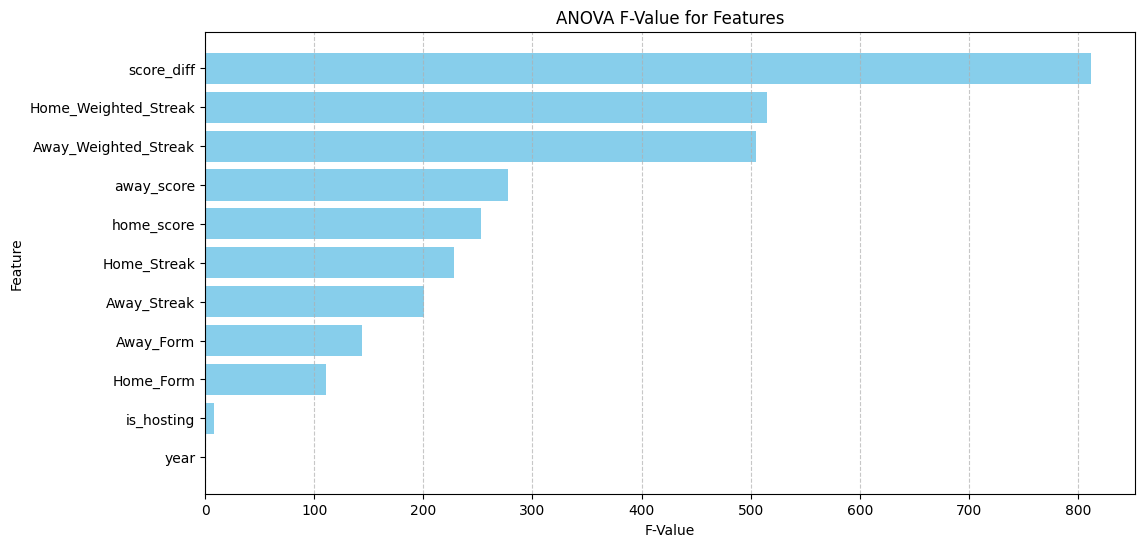

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

anova_results = pd.DataFrame({
    'Feature': ['match_score', 'outcome_encoded', 'score_diff', 'Home_Weighted_Streak', 
                'Away_Weighted_Streak', 'away_score', 'home_score', 'Home_Streak', 
                'Away_Streak', 'Away_Form', 'Home_Form', 'is_hosting', 'year'],
    'F-Value': [float('inf'), float('inf'), 811.540117, 515.077289, 504.778332, 
                277.830501, 252.426596, 227.729493, 200.853553, 143.473107, 
                110.465171, 8.447540, 0.426665],
    'P-Value': [0.0, 0.0, 6.209643e-202, 1.102396e-149, 1.365880e-147, 
                1.249488e-94, 1.074791e-87, 1.042918e-80, 8.272370e-73, 
                8.670032e-55, 1.298369e-43, 2.319544e-04, 6.528143e-01]
})

anova_results_filtered = anova_results[anova_results['F-Value'] != float('inf')]


anova_results_filtered = anova_results_filtered.sort_values(by='F-Value', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(anova_results_filtered['Feature'], anova_results_filtered['F-Value'], color='skyblue')
plt.xlabel('F-Value')
plt.ylabel('Feature')
plt.title('ANOVA F-Value for Features')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [19]:
import pandas as pd

numeric_features = data.select_dtypes(include=['float64', 'int64'])
# Compute the Pearson correlation matrix
correlation_matrix = numeric_features.corr(method='pearson')

print("\nPearson Correlation Matrix:")
print(correlation_matrix)

target = data['outcome'] 

target_numeric = pd.to_numeric(target, errors='coerce')  

numeric_target_correlation = numeric_features.apply(lambda x: x.corr(target_numeric))

print("\nPearson Correlation with target variable:")
print(numeric_target_correlation)


Pearson Correlation Matrix:
                          year  home_score  away_score  score_diff  \
year                  1.000000   -0.176792   -0.175091   -0.016311   
home_score           -0.176792    1.000000   -0.055842    0.765938   
away_score           -0.175091   -0.055842    1.000000   -0.684683   
score_diff           -0.016311    0.765938   -0.684683    1.000000   
match_score          -0.005626    0.575823   -0.593423    0.802455   
Home_Streak          -0.032949    0.351744   -0.347465    0.480506   
Away_Streak          -0.131854   -0.345207    0.395687   -0.506785   
Home_Weighted_Streak -0.017010    0.426969   -0.427343    0.586853   
Away_Weighted_Streak -0.088598   -0.436273    0.488971   -0.633328   
Home_Form             0.037595    0.208304   -0.290856    0.339346   
Away_Form            -0.037267   -0.279399    0.333861   -0.418935   
outcome_encoded      -0.005626    0.575823   -0.593423    0.802455   
is_hosting           -0.103637    0.076839   -0.080041    0.1

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
data['outcome_encoded'] = label_encoder.fit_transform(data['outcome'])

print(label_encoder.classes_)  

['A' 'D' 'H']


In [17]:
data['is_hosting'] = (data['home_team'] == data['country']).astype(int)

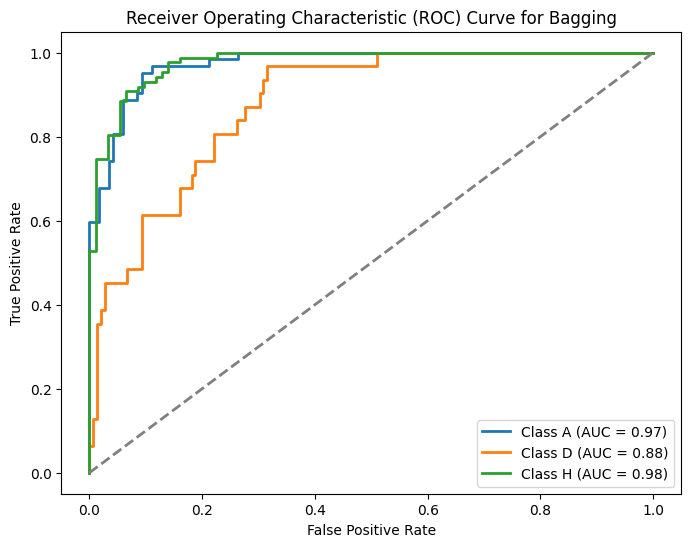

Bagging Classification Report:
              precision    recall  f1-score   support

           A       0.87      0.87      0.87        62
           D       0.52      0.45      0.48        31
           H       0.89      0.93      0.91        87

    accuracy                           0.83       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.82      0.83      0.82       180



In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt  

# Create 'is_hosting' feature
data['is_hosting'] = (data['home_team'] == data['country']).astype(int)

label_encoder = LabelEncoder()
data['outcome_encoded'] = label_encoder.fit_transform(data['outcome'])

features = ['is_hosting',
            'Home_Weighted_Streak', 'Away_Weighted_Streak', 'Home_Form', 'Away_Form']
X = data[features]
y = data['outcome_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Feature Scaling
scaler = StandardScaler()  # You can also use MinMaxScaler() for normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Bagging with Logistic Regression as base model ---
base_model = LogisticRegression(random_state=42)

# Initialize the BaggingClassifier with Logistic Regression as the base model
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Predictions
bagging_predictions = bagging_model.predict(X_test)

# Get predicted probabilities for each class
bagging_probabilities = bagging_model.predict_proba(X_test)

# Binarize the true labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) 

# ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# ROC curve and AUC
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], bagging_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot 
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging')
plt.legend(loc='lower right')
plt.show()

print("Bagging Classification Report:")
print(classification_report(y_test, bagging_predictions, target_names=label_encoder.classes_))




c:\Users\mune1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


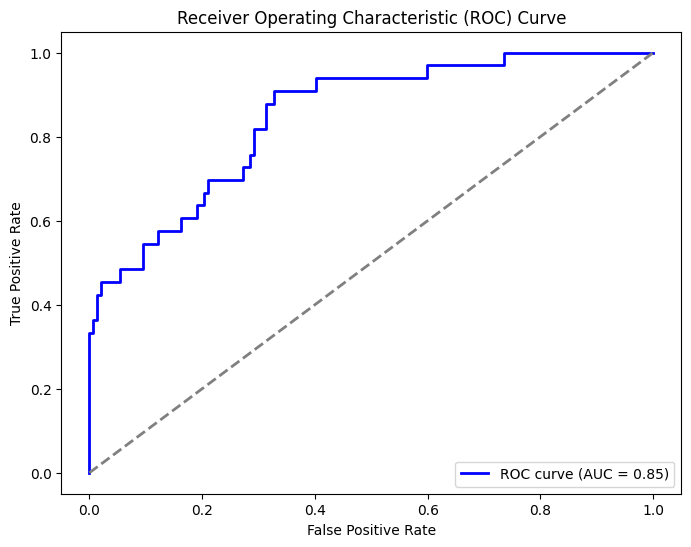

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           A       0.87      0.90      0.88        67
           D       0.57      0.48      0.52        33
           H       0.90      0.94      0.92        80

    accuracy                           0.84       180
   macro avg       0.78      0.77      0.78       180
weighted avg       0.83      0.84      0.83       180



In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create 'is_hosting' feature
data['is_hosting'] = (data['home_team'] == data['country']).astype(int)


label_encoder = LabelEncoder()
data['outcome_encoded'] = label_encoder.fit_transform(data['outcome'])

# Selected Features and Target Variable
features = ['is_hosting', 
            'Home_Weighted_Streak', 'Away_Weighted_Streak', 'Home_Form', 'Away_Form']
X = data[features]
y = data['outcome_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Feature Scaling
scaler = StandardScaler()  # You can also use MinMaxScaler() for normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
# Logistic Regression
lr_model = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=500)
lr_model.fit(X_train_scaled, y_train)


# Predictions
lr_predictions = lr_model.predict(X_test_scaled)

# Get predicted probabilities for the positive class (assuming multi-class classification)
lr_probabilities = lr_model.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr, tpr, thresholds = roc_curve(y_test, lr_probabilities[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions, target_names=label_encoder.classes_))




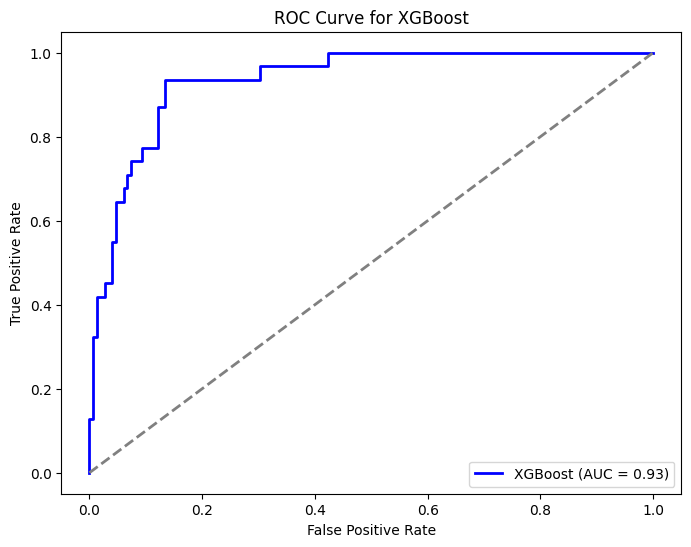

XGBoost Classification Report:
              precision    recall  f1-score   support

           A       0.92      0.83      0.88        59
           D       0.61      0.74      0.67        31
           H       0.93      0.92      0.93        90

    accuracy                           0.86       180
   macro avg       0.82      0.83      0.82       180
weighted avg       0.87      0.86      0.87       180

XGBoost Confusion Matrix:
[[49  9  1]
 [ 3 23  5]
 [ 1  6 83]]

XGBoost Feature Importances:
                 Feature  Importance
2  Away_Weighted_Streak    0.442907
1  Home_Weighted_Streak    0.349628
3             Home_Form    0.092294
4             Away_Form    0.075181
0            is_hosting    0.039990


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
# Load dataset (assuming 'data' is the DataFrame)
# Create 'is_hosting' feature
data['is_hosting'] = (data['home_team'] == data['country']).astype(int)

# Encode target variable (categorical -> numeric)
label_encoder = LabelEncoder()
data['outcome_encoded'] = label_encoder.fit_transform(data['outcome'])

# Selected Features and Target Variable
features = ['is_hosting', 
            'Home_Weighted_Streak', 'Away_Weighted_Streak', 'Home_Form', 'Away_Form']
X = data[features]
y = data['outcome_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Feature Scaling (optional for XGBoost, but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, 
                              max_depth=5, 
                              learning_rate=0.1, 
                              n_estimators=100, 
                              objective='multi:softmax', 
                              num_class=len(label_encoder.classes_))

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

xgb_probs = xgb_model.predict_proba(X_test_scaled)

# Compute ROC curve for each class
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs[:, 1], pos_label=1)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()
# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions, target_names=label_encoder.classes_))

# Confusion Matrix
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))

# Feature Importance for XGBoost
xgb_importances = xgb_model.feature_importances_
importance_df_xgb = pd.DataFrame({'Feature': features, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)
print("\nXGBoost Feature Importances:\n", importance_df_xgb)



c:\Users\mune1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


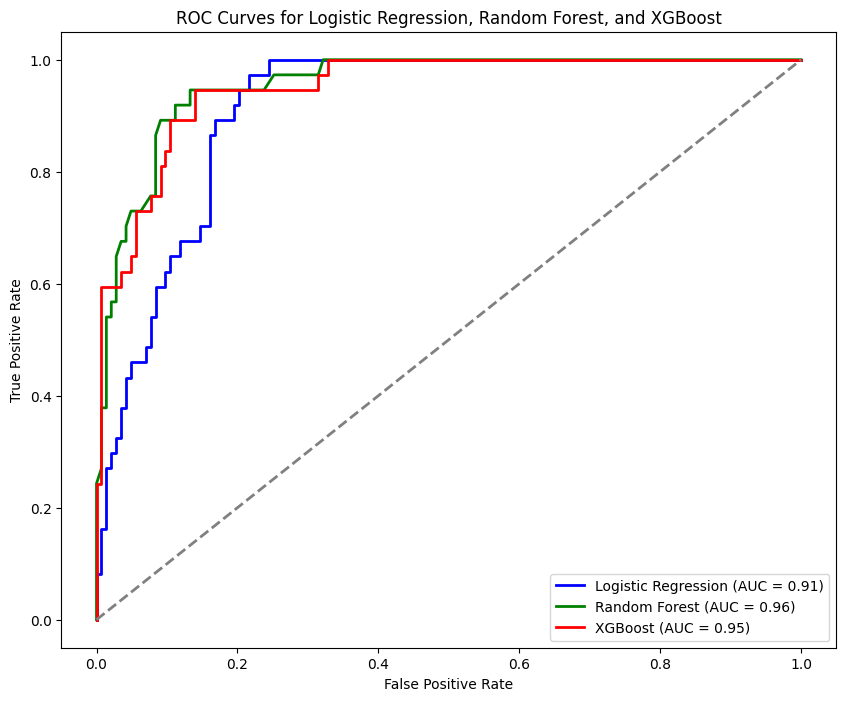

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           A       0.86      0.95      0.90        58
           D       0.72      0.49      0.58        37
           H       0.87      0.93      0.90        85

    accuracy                           0.84       180
   macro avg       0.82      0.79      0.79       180
weighted avg       0.83      0.84      0.83       180

Random Forest Classification Report:
              precision    recall  f1-score   support

           A       0.87      0.95      0.91        58
           D       0.79      0.59      0.68        37
           H       0.92      0.96      0.94        85

    accuracy                           0.88       180
   macro avg       0.86      0.84      0.84       180
weighted avg       0.88      0.88      0.88       180

XGBoost Classification Report:
              precision    recall  f1-score   support

           A       0.88      0.97      0.92        58
           D      

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Create 'is_hosting' feature
data['is_hosting'] = (data['home_team'] == data['country']).astype(int)

label_encoder = LabelEncoder()
data['outcome_encoded'] = label_encoder.fit_transform(data['outcome'])

# Selected Features and Target Variable
features = ['is_hosting', 
            'Home_Weighted_Streak', 'Away_Weighted_Streak', 'Home_Form', 'Away_Form']
X = data[features]
y = data['outcome_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=500)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_probs = lr_model.predict_proba(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)

# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, max_depth=5, learning_rate=0.1, n_estimators=100, objective='multi:softmax', num_class=len(label_encoder.classes_))
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)
xgb_probs = xgb_model.predict_proba(X_test_scaled)

# Compute ROC curve for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs[:, 1], pos_label=1)  # Logistic Regression
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs[:, 1], pos_label=1)  # Random Forest
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs[:, 1], pos_label=1)  # XGBoost

# Calculate AUC for each model
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves in one figure
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression, Random Forest, and XGBoost')
plt.legend(loc='lower right')
plt.show()

# Evaluation Reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions, target_names=label_encoder.classes_))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions, target_names=label_encoder.classes_))

# Confusion Matrices
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))


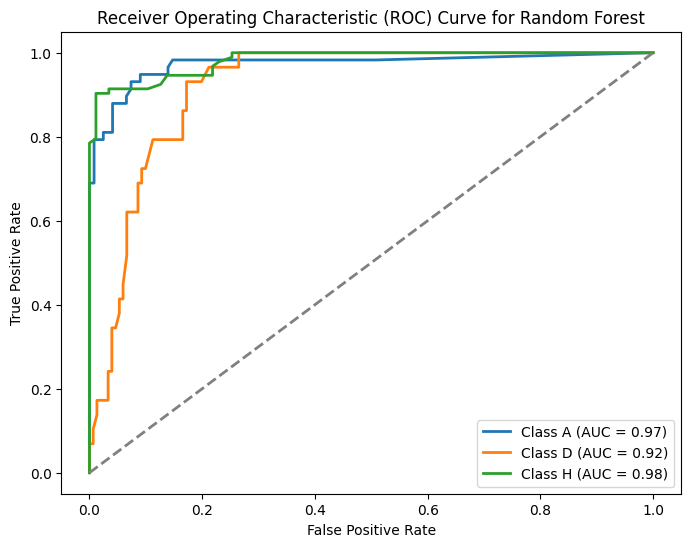

Random Forest Classification Report:
              precision    recall  f1-score   support

           A       0.84      0.91      0.88        58
           D       0.61      0.66      0.63        29
           H       0.98      0.90      0.94        93

    accuracy                           0.87       180
   macro avg       0.81      0.82      0.82       180
weighted avg       0.87      0.87      0.87       180



In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt  

# Create 'is_hosting' feature
data['is_hosting'] = (data['home_team'] == data['country']).astype(int)

label_encoder = LabelEncoder()
data['outcome_encoded'] = label_encoder.fit_transform(data['outcome'])

features = ['is_hosting', 
            'Home_Weighted_Streak', 'Away_Weighted_Streak', 'Home_Form', 'Away_Form']
X = data[features]
y = data['outcome_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Random Forest Classifier ---

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)

# Train the Random Forest model
random_forest_model.fit(X_train_scaled, y_train)

# Predictions
rf_predictions = random_forest_model.predict(X_test_scaled)

# Get predicted probabilities for each class
rf_probabilities = random_forest_model.predict_proba(X_test_scaled)

# Binarize the true labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# ROC and AUC for each class
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))


In [79]:
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
data['outcome_encoded'] = label_encoder.fit_transform(data['outcome'])

# Selected Features and Target Variable
features = ['is_hosting', 
            'Home_Weighted_Streak', 'Away_Weighted_Streak', 'Home_Form', 'Away_Form']
X = data[features]
y = data['outcome_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, max_depth=5, learning_rate=0.1, n_estimators=100, objective='multi:softmax', num_class=len(label_encoder.classes_))
xgb_model.fit(X_train_scaled, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

# Classification Report for XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions, target_names=label_encoder.classes_))


XGBoost Classification Report:
              precision    recall  f1-score   support

           A       0.91      0.95      0.93        62
           D       0.76      0.70      0.73        27
           H       0.98      0.97      0.97        91

    accuracy                           0.92       180
   macro avg       0.88      0.87      0.88       180
weighted avg       0.92      0.92      0.92       180



In [88]:
from sklearn.model_selection import cross_val_score

# Logistic Regression with Cross-Validation
lr_cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')  # 10-fold cross-validation
print(f"Logistic Regression CV Accuracy: {lr_cv_scores.mean()}")

# Random Forest with Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')  # 10-fold cross-validation
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean()}")



c:\Users\mune1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mune1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mune1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mune1\AppData\Local\Programs\Python\P

Logistic Regression CV Accuracy: 0.8411111111111109
Random Forest CV Accuracy: 0.8666666666666668


In [86]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression (on the test set)
lr_cm = confusion_matrix(y_test, lr_predictions)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)

# Confusion matrix for Random Forest (on the test set)
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Random Forest Confusion Matrix:")
print(rf_cm)

Logistic Regression Confusion Matrix:
[[29  9 24]
 [12  2 13]
 [23 14 54]]
Random Forest Confusion Matrix:
[[28 11 23]
 [13  3 11]
 [22 14 55]]


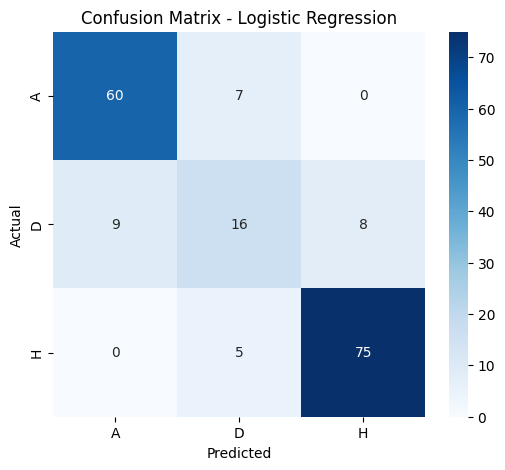

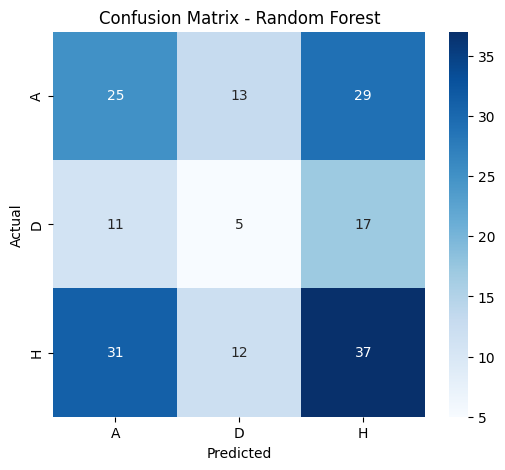

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Visualize confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()